In [41]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq

In [42]:
seqA = SeqIO.read('./Exercises/a.fasta', 'fasta')
seqB = SeqIO.read('./Exercises/b.fasta', 'fasta')

seqA = seqA.seq
seqB = seqB.seq

print(f"SeqA: {seqA}")
print(f"SeqB: {seqB}")

SeqA: ATGGTGTTGGATCTGGACTTGTTTCGGACGGATAAAGGAGGAGACCCGGACCGCATCCGAGAGACGCAAAAGAACCGCTTCAAGGACCCGGGACTCGTGGATCGGCTGGTGAAGGCGGACGGCGAGTGGCGAAAATGCAGATTTCAGACCGACAACTTGAACAAGCTGAAGAACCTATGCAGCAAGACAATTGGAGAGAAAATGAAGAAAAAAGAGCCAGTGGGAAATGATGAGTCCATTCCGGAGAACTTGTTAAATCTCGATGACCTCACTTCAGACACTTTAGCTAACCTGAAAGTGTCACAGATCAAAAAACTCCGACTCCTCATCGACGAAGCCATCCTGAAGTGTGACGCCCAGCGGATAAAGCTGCAGGAATAGCGGTTTGAGAACCTCCGCGAGCGATTCGATGGCTAGGTCCTGCATCCCTCGGTGCCCATCAGTAACGATGAGGATGCGGACAACAAAGTCGAGAGGATCTGGGGTGACTGCACCGTCAAGAAGAAGTACTCGCACGTGGACCTGGTGGTGATGGTCGATGGCTTTGAAGGCGAAAAAGGGGTCGTGGTGGCTGGCAGTCGAGGGTACTTCCTGAAGGGGCCCCTGGTGTTCCTGGAACAGGCGCTCATCCAGTACGCCCTTCGCACCTTGGGAAGTCGGGGCTACATTCCCATTTACACCCCGTTTTTCATGAGGAAGGAGGTCATGCAGGAGGTGGCACAGCTCAGCCAGTTTGATGAAGAGCTTTACAAGGTGATTGGCAAAGGCAGTGAAAAGTCTGACGACAACTCCTACGATGAGAAATACCTGATTGCCACCTCCGAGCAGCCCATCGCTGCTCTCCACCGAGATGAGTGGCTACGGCCAGAGGATTTGCCCATCAAGTATGCTGGCCTGTCCACCTGCTTTCGCCAGGAGGTGGGCTCCCACGGCCGGGACACCCGCGGCATCTTCCGAGTCCATCAGTTTGAGAAGATCGAGCAGTTTGTCTACG

In [43]:
# Total Length
print(f"Total length of SeqA: {len(seqA)}")

# TAC first index appears
print(f"TAC first index appears in SeqA: {seqA.find('TAC')}")

# Sequence C
seqA_sliced = seqA[:10]
seqB_sliced = seqB[-15:]
seqC = (seqA_sliced+seqB_sliced)[::-1]
print(f"SeqC: {seqC}")

Total length of SeqA: 1883
TAC first index appears in SeqA: 507
SeqC: CAGCTGAAAGCGGACGGTTGTGGTA


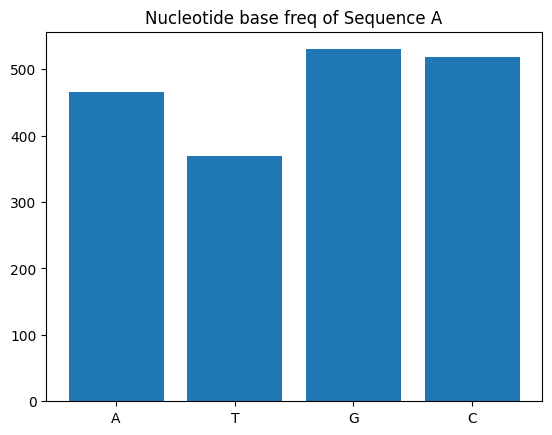

In [44]:
import matplotlib.pyplot as plt
from collections import Counter

seqA_freq = Counter(seqA)
seqB_freq = Counter(seqB)
seqC_freq = Counter(seqC)

plt.title("Nucleotide base freq of Sequence A")
plt.bar(seqA_freq.keys(), seqA_freq.values())
plt.show()

In [45]:
from Bio.SeqUtils import GC

seqA_GC = GC(seqA)
seqA_AT = 100-seqA_GC

print(f"GC: {seqA_GC:.2f}%, AT: {seqA_AT:.2f}%")

from Bio.SeqUtils import MeltingTemp as MT
print(f"MT of SeqA: {MT.Tm_Wallace(seqA)}")

from Bio.SeqUtils import molecular_weight as MW
print(f"MW of SeqA: {MW(seqA)}")

GC: 55.71%, AT: 44.29%
MT of SeqA: 5864.0
MW of SeqA: 582470.8098000064


In [46]:
seqA_mRNA = seqA.transcribe()

print(f"mRNA of SeqA: {seqA_mRNA}")

seqA_amino = seqA_mRNA.translate()

print(f"Amino acid of SeqA: {seqA_amino}")

mRNA of SeqA: AUGGUGUUGGAUCUGGACUUGUUUCGGACGGAUAAAGGAGGAGACCCGGACCGCAUCCGAGAGACGCAAAAGAACCGCUUCAAGGACCCGGGACUCGUGGAUCGGCUGGUGAAGGCGGACGGCGAGUGGCGAAAAUGCAGAUUUCAGACCGACAACUUGAACAAGCUGAAGAACCUAUGCAGCAAGACAAUUGGAGAGAAAAUGAAGAAAAAAGAGCCAGUGGGAAAUGAUGAGUCCAUUCCGGAGAACUUGUUAAAUCUCGAUGACCUCACUUCAGACACUUUAGCUAACCUGAAAGUGUCACAGAUCAAAAAACUCCGACUCCUCAUCGACGAAGCCAUCCUGAAGUGUGACGCCCAGCGGAUAAAGCUGCAGGAAUAGCGGUUUGAGAACCUCCGCGAGCGAUUCGAUGGCUAGGUCCUGCAUCCCUCGGUGCCCAUCAGUAACGAUGAGGAUGCGGACAACAAAGUCGAGAGGAUCUGGGGUGACUGCACCGUCAAGAAGAAGUACUCGCACGUGGACCUGGUGGUGAUGGUCGAUGGCUUUGAAGGCGAAAAAGGGGUCGUGGUGGCUGGCAGUCGAGGGUACUUCCUGAAGGGGCCCCUGGUGUUCCUGGAACAGGCGCUCAUCCAGUACGCCCUUCGCACCUUGGGAAGUCGGGGCUACAUUCCCAUUUACACCCCGUUUUUCAUGAGGAAGGAGGUCAUGCAGGAGGUGGCACAGCUCAGCCAGUUUGAUGAAGAGCUUUACAAGGUGAUUGGCAAAGGCAGUGAAAAGUCUGACGACAACUCCUACGAUGAGAAAUACCUGAUUGCCACCUCCGAGCAGCCCAUCGCUGCUCUCCACCGAGAUGAGUGGCUACGGCCAGAGGAUUUGCCCAUCAAGUAUGCUGGCCUGUCCACCUGCUUUCGCCAGGAGGUGGGCUCCCACGGCCGGGACACCCGCGGCAUCUUCCGAGUCCAUCAGUUUGAGAAGAUCGAGCAGUU

c:\Users\Steven\anaconda3\envs\computational_biology\lib\site-packages\Bio\Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [47]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

seqA_alignment = pairwise2.align.localxx(seqA, 'CGCTACTAGCATGCGCAT')
top_alignment = seqA_alignment[0]
print(f"{format_alignment(*top_alignment)}")
print(f"Alignment Score of SeqA: {top_alignment[2]}")

from Levenshtein import distance
print(f"Lev Dist of {distance(seqA, seqB)}")

1815 CAGCTCTCCCTGGAACCACACTCACTTGTGCTTTTCCTCCTAAATAAAGCTGTTCCATGTAGCAAGT
     | |      ||        ||| |     |         |       |  ||   |     || | |
   1 C-G------CT--------ACT-A-----G---------C-------A--TG---C-----GC-A-T
  Score=18

Alignment Score of SeqA: 18.0
Lev Dist of 1039
